In [1]:
from importlib import reload
import abbot.rotation
import abbot.gradientOperator

In [2]:
reload(abbot.rotation)

<module 'abbot.rotation' from '/Users/nab/work/Projects/abbot/rotation.py'>

In [3]:
from NumRec import circle
import numpy
import pylab
import Zernike
import kolmogorov
##
N=31
aperture=Zernike.anyZernike(1,N,N//2)
##
gOp=abbot.gradientOperator.gradientOperatorType1(pupilMask=aperture)
gM=gOp.returnOp()
##
# want slopes that involve edge phase points

##
phs=kolmogorov.TwoScreens(N,N//4)[0]#Zernike.anyZernike(4,N,N//2)
phsV=phs.ravel().take(gOp.illuminatedCornersIdx)
slpsV=gM@phsV
##
edge_phase_idx=(gOp.illuminatedCorners.ravel().take(gOp.illuminatedCornersIdx)<=2).nonzero()[0]
edge_phase_cds_idx=gOp.illuminatedCornersIdx.take(edge_phase_idx)

In [11]:
this_ang=4.8
rotOp=abbot.rotation.rotationExplicitOperator(this_ang,pupilMask=aperture)
rotM=rotOp.returnOp()
rotSlpsOp=abbot.rotation.slopeRotationExplicitOperator(this_ang,pupilMask=aperture)
rotSlpsM=rotSlpsOp.returnOp()

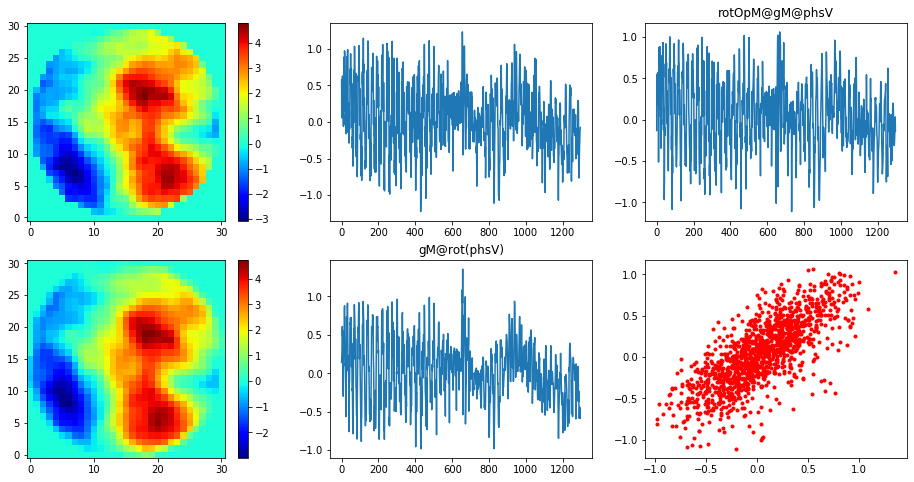

In [12]:
import pylab
pylab.figure(figsize=(16,8))
pylab.subplot(2,3,2)
pylab.plot( slpsV )
##
pylab.subplot(2,3,1)
this_2d=rotOp.illuminatedCorners*0
this_2d.ravel()[rotOp.illuminatedCornersIdx]=rotM@phsV
pylab.imshow( this_2d, cmap='jet' )
pylab.colorbar()
#
from scipy.ndimage import rotate
this_2d.ravel()[rotOp.illuminatedCornersIdx]=phsV
rot_this_2d=rotate(this_2d,this_ang,(0,1),False,order=3,mode='constant',prefilter=False)
rot_phsV=rot_this_2d.ravel().take(gOp.illuminatedCornersIdx)
this_2d=rot_this_2d
##
pylab.subplot(2,3,3+1)
#this_2d.ravel()[rotOp.illuminatedCornersIdx]=(numpy.identity(gOp.numberPhases)-rotM)@this_2d.ravel()[rotOp.illuminatedCornersIdx]
pylab.imshow( this_2d, cmap='jet' )
pylab.colorbar()
#pylab.plot( edge_phase_cds_idx%31, edge_phase_cds_idx//31, 's',markeredgecolor='r',markerfacecolor='none' )
##
pylab.subplot(2,3,3)
pylab.plot(rotSlpsM@slpsV)
pylab.title("rotOpM@gM@phsV")
##
pylab.subplot(2,3,3+2)
slpsRotV=gM@rot_phsV
pylab.plot(slpsRotV)
pylab.title("gM@rot(phsV)")
##
pylab.subplot(2,3,3+3)
pylab.plot(slpsRotV,rotSlpsM@slpsV,'r.')
#
diffV=(slpsV-rotSlpsM@slpsV)#/(slpsV+1e-2)

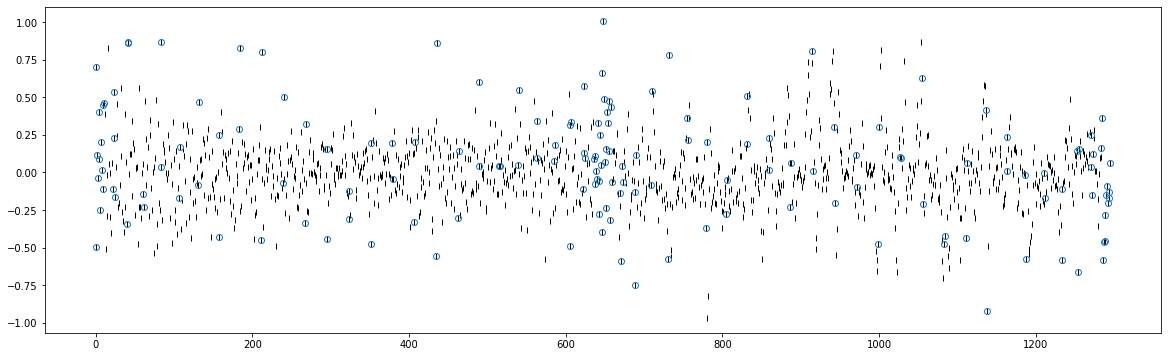

In [13]:
gM.take(edge_phase_idx,1).shape
edge_slope_idx=numpy.unique( gM.take(edge_phase_idx,1).nonzero()[0] )
pylab.figure(figsize=(20,6))
pylab.plot( diffV, 'k|')
pylab.plot( edge_slope_idx, diffV[edge_slope_idx], 'o', markerfacecolor='none')
#pylab.axis([0,50,-1,1])

0,1,2,

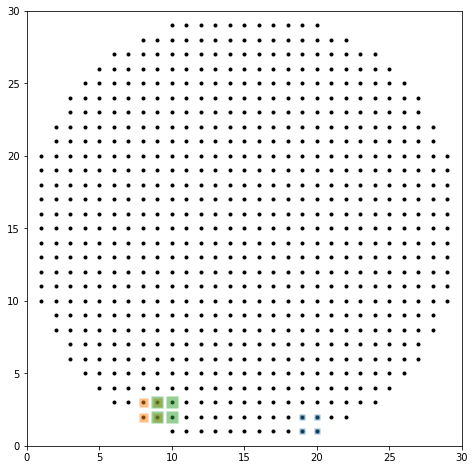

In [14]:
pylab.figure(figsize=(8,8))
pylab.plot( gOp.illuminatedCornersIdx%gOp.n_[0], gOp.illuminatedCornersIdx//gOp.n_[0], 'k.' )
for i,l in enumerate((gM.take(edge_slope_idx,0).nonzero()[1].reshape([-1,4]))[9:12]):
    print(i,end=",")
    pylab.plot( gOp.illuminatedCornersIdx.take(l)%gOp.n_[0], gOp.illuminatedCornersIdx.take(l)//gOp.n_[1],
               's', markeredgecolor='none', markersize=(2+i%3)*3, alpha=0.5 )
pylab.axis([0,gOp.n[1],0,gOp.n[0]])
pylab.gca().set_aspect(1)